In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X_moons,y_moons = make_moons(n_samples = 150,noise = 0.2,random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_moons,y_moons,test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_clf.score(X_train,y_train),dt_clf.score(X_test,y_test)

(1.0, 0.9333333333333333)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['entropy','gini'],
    'max_depth' : [50,100,150,200,250],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9]    # eger overfitting gorsek max yazilanlari azaldiriq min yazilanlaro artiririq
}

gsc_dt_clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 3)
gsc_dt_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [50, 100, 150, 200, 250],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

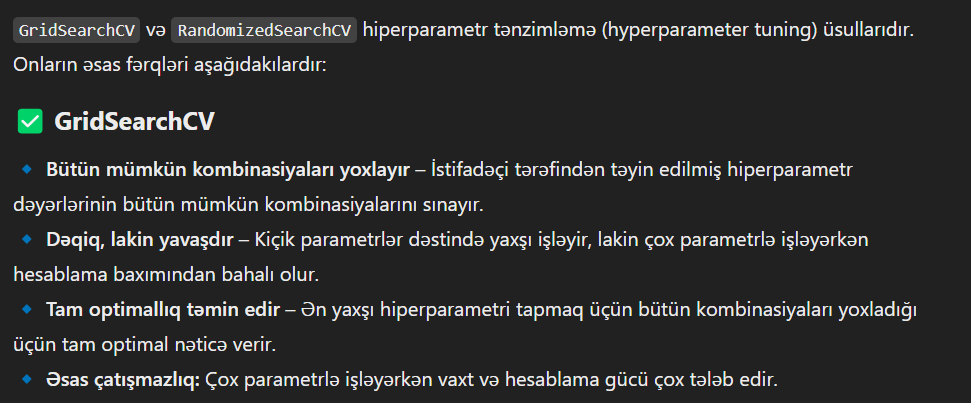

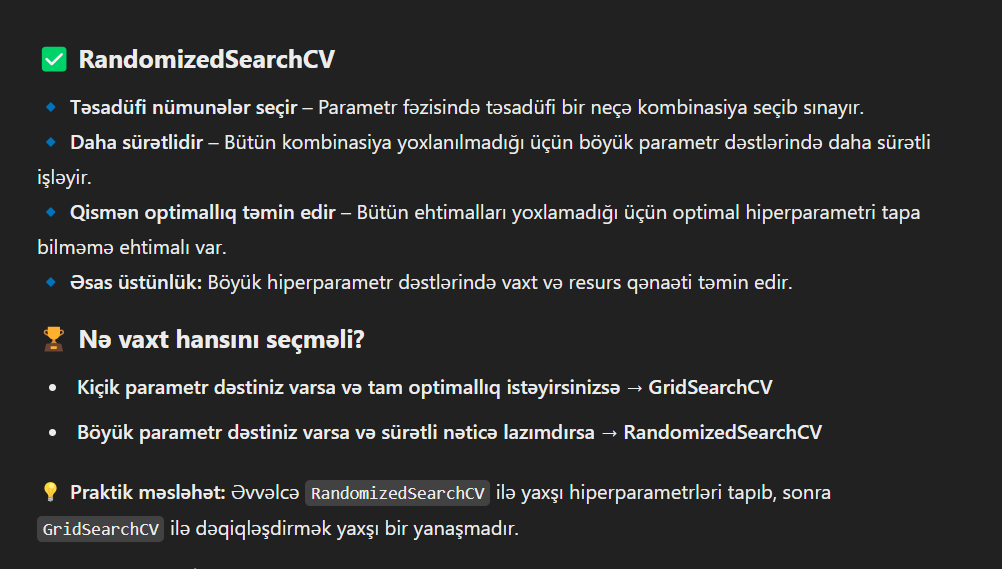

In [ ]:
gsc_dt_clf.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1}

In [ ]:
gsc_dt_clf.best_estimator_.score(X_train,y_train),gsc_dt_clf.best_estimator_.score(X_test,y_test)

(1.0, 0.9666666666666667)

Iris Data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame = True)
X_iris = iris.data[['petal length (cm)','petal width (cm)']].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2,random_state = 42)

tree_clf.fit(X_iris,y_iris)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents = True, exist_ok = True)   #izah

In [ ]:
from sklearn.tree import export_graphviz

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = str(IMAGES_PATH / "iris_tree.dot"),
    feature_names = ['petal length (cm)','petal width (cm)'],
    class_names = iris.target_names,
    rounded = True,
    filled = True                     # izah buna da
)

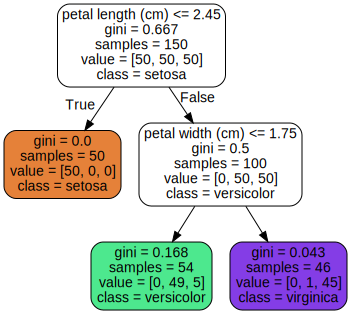

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")

Estimating Class Probabilities

In [ ]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5,1.5]])

array([1])

In [ ]:
from sklearn.datasets import make_moons
X_moons,y_moons = make_moons(n_samples = 150,noise = 0.2,random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state = 42)

tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
X_moons_test,y_moons_test = make_moons(n_samples = 150,noise = 0.2,random_state = 53)

In [ ]:
tree_clf1.score(X_moons_test,y_moons_test),tree_clf2.score(X_moons_test,y_moons_test)

(0.8666666666666667, 0.92)

Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)

tree_reg = DecisionTreeRegressor(max_depth = 2,random_state = 42)
tree_reg.fit(X_quad,y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
tree_reg.score(X_quad,y_quad)

0.7966018355059642

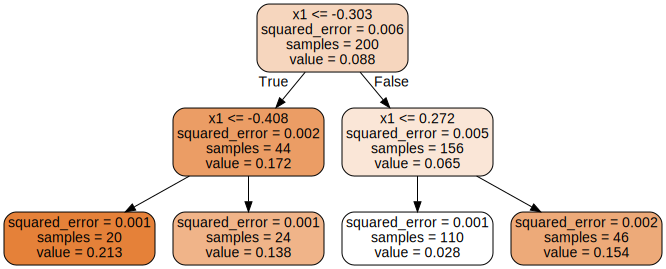

In [ ]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH/ "regression_tree.dot"),
    feature_names = ['x1'],
    rounded = True,
    filled = True
)

Source.from_file(IMAGES_PATH/ "regression_tree.dot")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(),PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth = 2,random_state = 42)
tree_clf_pca.fit(X_iris_rotated,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

#train / validation/ set


In [ ]:
#X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size = 0)
#X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size = 0.2)


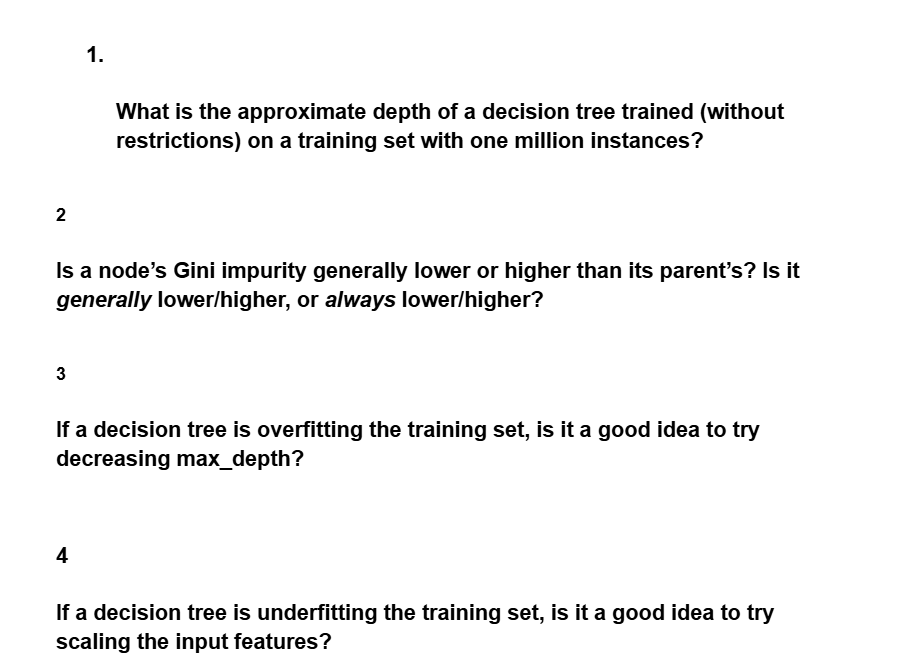

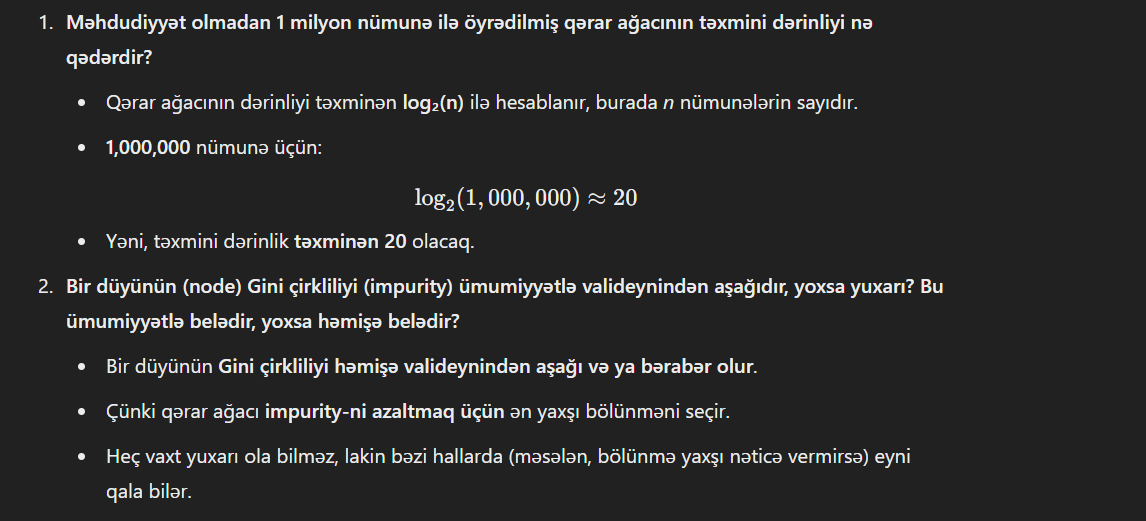

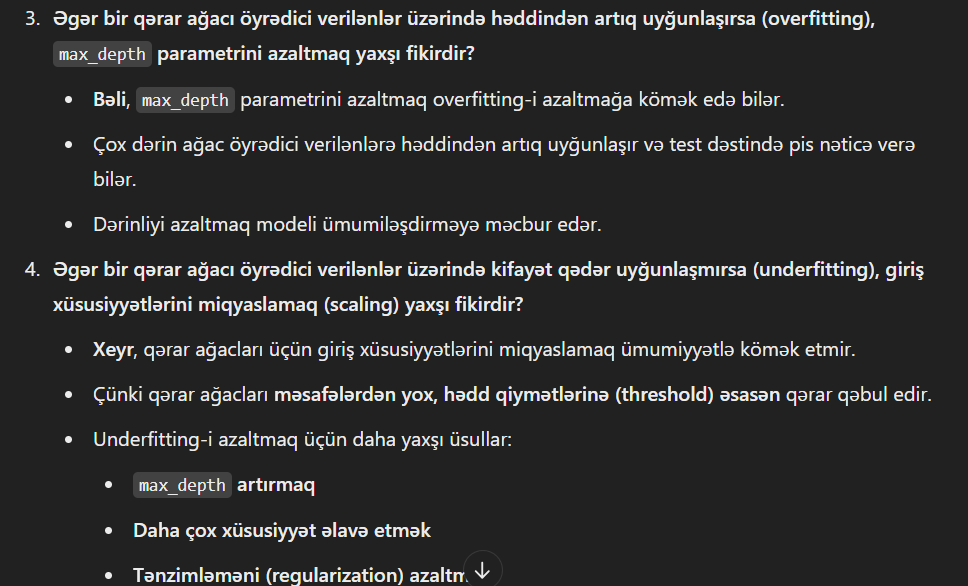

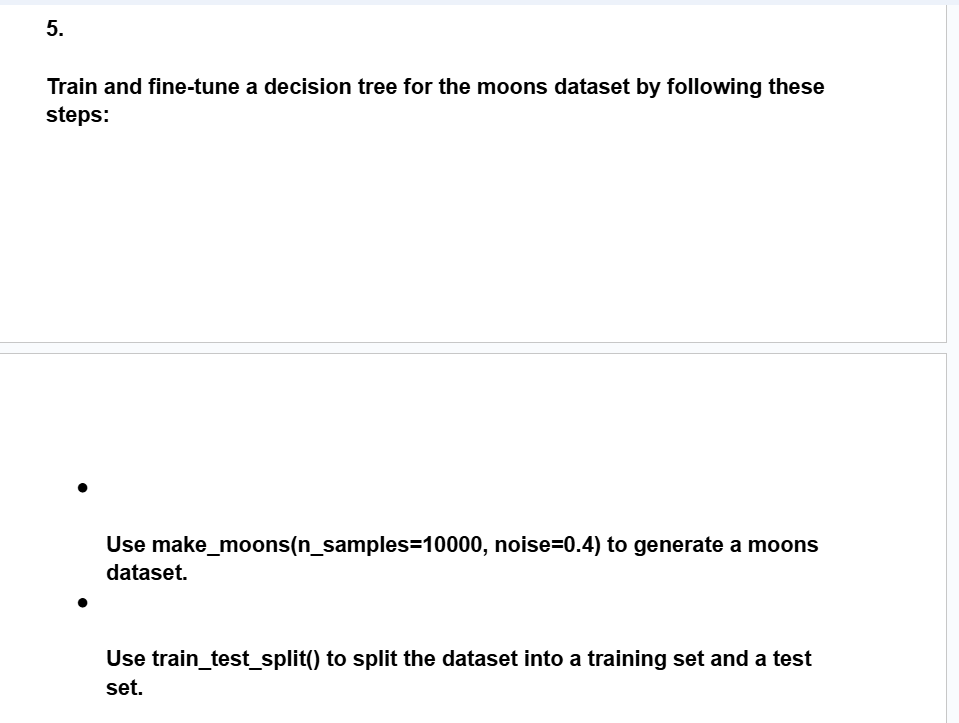

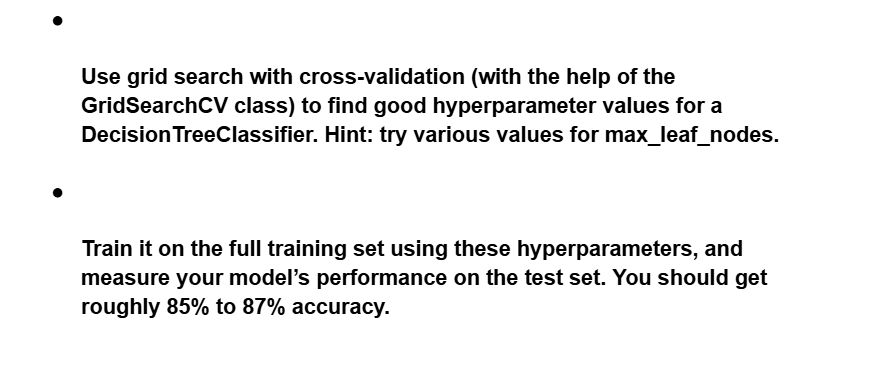

In [ ]:
from sklearn.datasets import make_moons

X_moons,y_moons = make_moons(n_samples=10000, noise=0.4,random_state =42)

X_train,X_test,y_train,y_test = train_test_split(X_moons,y_moons,test_size=0.2)

tree_clf = DecisionTreeClassifier(max_depth = 2,random_state = 42)

param_grid = {
    'criterion' : ['entropy','gini'],
    'max_depth' : [50,100,150,200,250],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9]    # eger overfitting gorsek max yazilanlari azaldiriq min yazilanlaro artiririq
}

gsc_dt_clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 3)
gsc_dt_clf.fit(X_train,y_train)
gsc_dt_clf.best_estimator_.score(X_train,y_train),gsc_dt_clf.best_estimator_.score(X_test,y_test)

(0.893125, 0.8355)